In [1]:
!pip install mlxtend
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [2]:
book = pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
book.shape

(2000, 11)

In [5]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(book,min_support=0.1,max_len=3,use_colnames = True)
frequent_itemsets 

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [6]:
print(len(frequent_itemsets))

39


In [7]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(book, min_support=0.1, use_colnames= True, verbose=1)
print(frequent_itemsets.head())

Processing 44 combinations | Sampling itemset size 4
   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
frequent_itemsets.sort_values("support", ascending = False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


In [9]:
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.5)
print(rules.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475               0.423   0.1650   
1   (CookBks)  (ChildBks)              0.4310               0.423   0.2560   
2  (ChildBks)   (CookBks)              0.4230               0.431   0.2560   
3  (DoItYBks)  (ChildBks)              0.2820               0.423   0.1840   
4    (RefBks)  (ChildBks)              0.2145               0.423   0.1515   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  1.576044  0.060308    1.731000       0.485714  
1    0.593968  1.404179  0.073687    1.421069       0.505870  
2    0.605201  1.404179  0.073687    1.441240       0.498856  
3    0.652482  1.542511  0.064714    1.660347       0.489842  
4    0.706294  1.669725  0.060767    1.964548       0.510629  


In [10]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)
rules.sort_values('lift',ascending = False).head(10)  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [11]:
rules[(rules.support > 0.015) & (rules.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(70, 10)

In [12]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008,2
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834,2
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,2
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298,2
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,0.741584,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

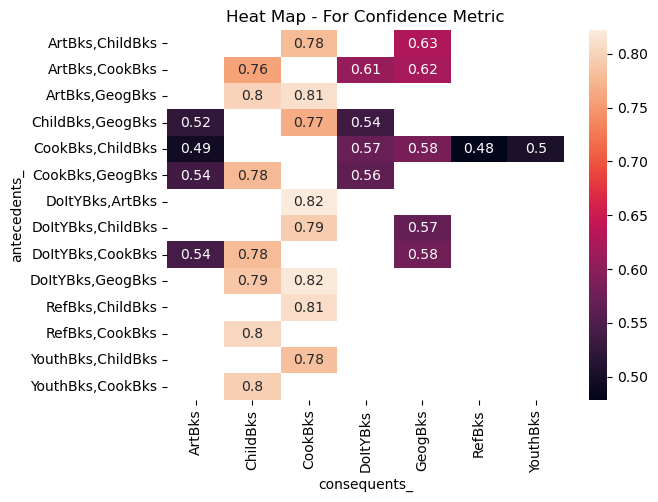

In [13]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [14]:
rules_li = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
print(rules_li.shape)

(100, 10)


In [15]:
rules_li['lhs items'] = rules_li['antecedents'].apply(lambda x:len(x) )
rules_li[rules_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008,2
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834,2
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,2
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298,2
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,0.741584,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

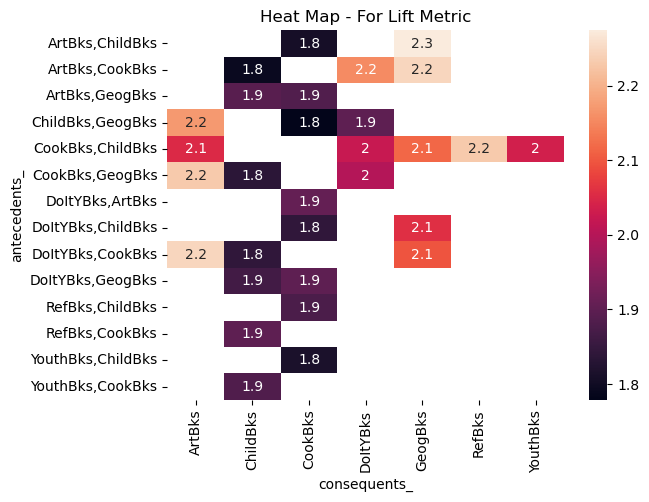

In [16]:
rules_li['antecedents_'] = rules_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_li['consequents_'] = rules_li['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_li[rules_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [17]:
# FP_GROWTH 
frequent_itemsets_fp=fpgrowth(book, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
4,0.431,(CookBks)
3,0.423,(ChildBks)
0,0.282,(DoItYBks)
1,0.276,(GeogBks)
23,0.256,"(CookBks, ChildBks)"


In [19]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)
print(rules_fp.shape)

(49, 10)


In [20]:
rules_fp[(rules_fp.support > 0.15) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
27,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
7,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
34,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047


In [21]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
45,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008,2
40,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834,2
42,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,2
44,"(CookBks, GeogBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298,2
47,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452,0.669894,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'YouthBks')])

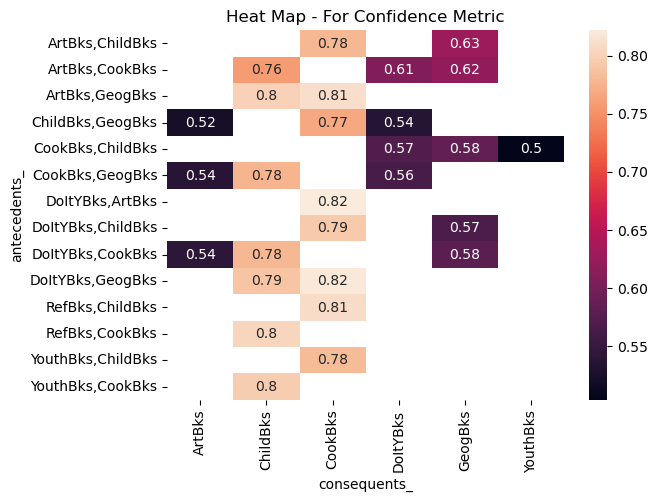

In [22]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [23]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.6)
print(rules_fp_li.shape)

(100, 10)


In [24]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
92,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008,2
81,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834,2
86,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,2
88,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298,2
60,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,0.741584,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

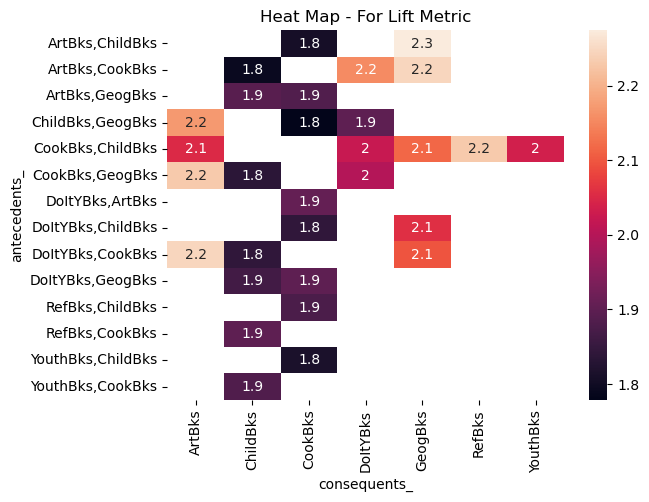

In [25]:
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)